# Análise de dados - Campeonato de Valorant

## Configuração do Ambiente

In [1]:
!pip install seaborn_qqplot
!pip install fitter

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn_qqplot import pplot
from fitter import Fitter, get_common_distributions, get_distributions

## Inicialização dos Dados

Nessa seção será feita o tratamento, limpeza e alguns processamentos dos dados, o que vai ser fundamental para executar uma boa análise e possivelmente tirar alguns insights sobre informações relevantes que podem ser extraídas.

### Leitura dos Dados

In [3]:
df = pd.read_csv("dataset.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df

,Players,Agents Played,Rounds Played,Rating,Average Combat Score,Kills:Deaths,"Kill, Assist, Trade, Survive %",Average Damage per Round,Kills Per Round,Assists Per Round,...,Headshot %,Clutch Success %,Maximum Kills in a single map,Kills,Deaths,Assists,First Kills,First Deaths,Cluthes Won,Clutches Played
0,k1Ng GEN,Viper Kayo,48,1.36,267.5,1.38,0.83,170.5,0.92,0.48,...,0.34,0.10,23,44,32,23,5,1,1.0,10
1,Shao NAVI,Fade Sage Astra,182,1.29,202.6,1.63,0.87,129.8,0.75,0.35,...,0.37,0.24,23,137,84,64,18,9,9.0,38
2,Leo FNC,Sova Sage Fade,307,1.28,225.0,1.41,0.81,143.2,0.79,0.33,...,0.19,0.27,25,243,172,100,15,7,13.0,49
3,mwzera FUR,Fade Skye Sova,76,1.26,255.3,1.31,0.76,166.0,0.93,0.32,...,0.20,0.22,34,71,54,24,7,5,2.0,9
4,Cloud GIA,Sova,97,1.26,233.4,1.21,0.79,151.7,0.82,0.14,...,0.32,0.14,26,80,66,14,13,5,2.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,soulcas TL,Sage Astra,41,0.59,112.5,0.53,0.56,70.3,0.39,0.24,...,0.24,NaN,10,16,30,10,1,4,0.0,6
158,NagZ KRÜ,Jett Killjoy,41,0.58,106.5,0.42,0.59,78.3,0.34,0.07,...,0.18,NaN,7,14,33,3,3,2,0.0,7
159,TENNN ZETA,Kayo Sova,41,0.58,132.5,0.50,0.56,84.4,0.41,0.20,...,0.23,0.17,9,17,34,8,3,12,1.0,6
160,2ge RRQ,Astra,24,0.51,111.0,0.56,0.58,82.9,0.42,0.25,...,0.29,NaN,10,10,18,6,0,1,0.0,2


### Verificação dos Valores e Dados Faltantes

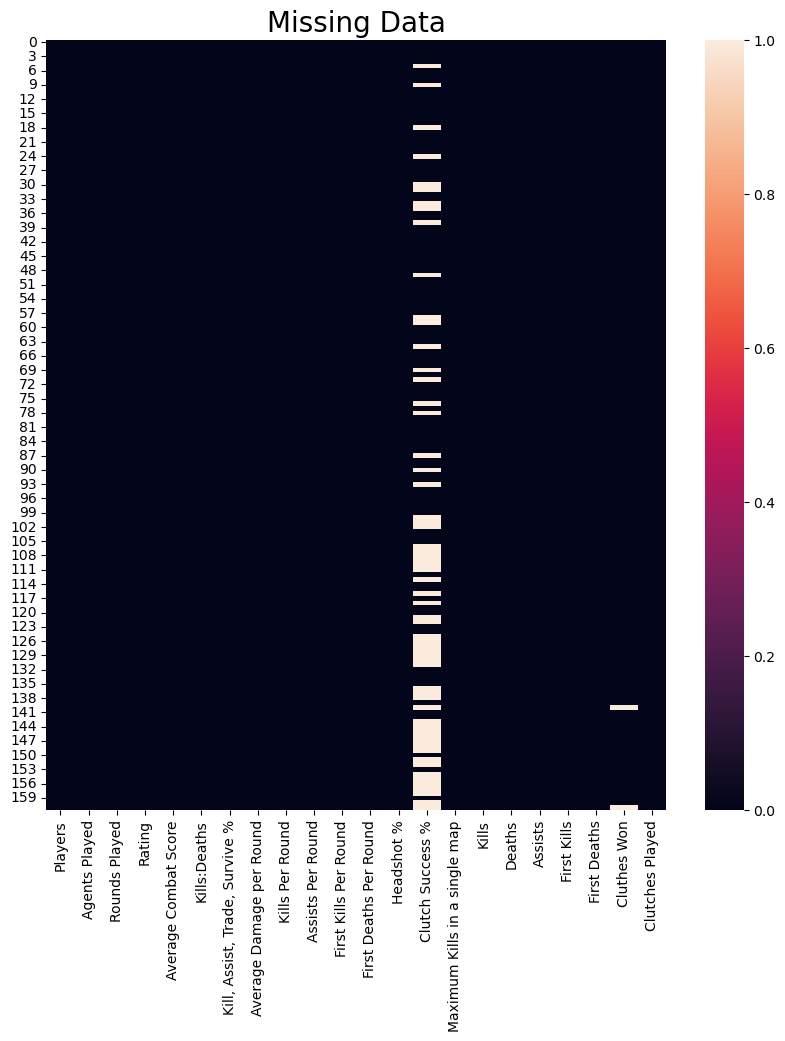

In [4]:
# Gráfico que mostra a distribuição de dados faltantes
plt.figure(figsize=(10,10))
plt.title("Missing Data", size=20)
sns.heatmap(df.isna());

In [5]:
df = df.drop(columns=["Clutch Success %"])
mean_value = df["Cluthes Won"].mean()
df["Cluthes Won"] = df["Cluthes Won"].fillna(value=mean_value)

In [6]:
# Verificação de informações gerais do gráfico
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Players                         162 non-null    object 
 1   Agents Played                   162 non-null    object 
 2   Rounds Played                   162 non-null    int64  
 3   Rating                          162 non-null    float64
 4   Average Combat Score            162 non-null    float64
 5   Kills:Deaths                    162 non-null    float64
 6   Kill, Assist, Trade, Survive %  162 non-null    float64
 7   Average Damage per Round        162 non-null    float64
 8   Kills Per Round                 162 non-null    float64
 9   Assists Per Round               162 non-null    float64
 10  First Kills Per Round           162 non-null    float64
 11  First Deaths Per Round          162 non-null    float64
 12  Headshot %                      162 

In [7]:
# Informações gerais sobre a distribuição dos dados
df.describe()

,Rounds Played,Rating,Average Combat Score,Kills:Deaths,"Kill, Assist, Trade, Survive %",Average Damage per Round,Kills Per Round,Assists Per Round,First Kills Per Round,First Deaths Per Round,Headshot %,Maximum Kills in a single map,Kills,Deaths,Assists,First Kills,First Deaths,Cluthes Won,Clutches Played
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,100.493827,0.942037,192.180864,0.933395,0.706667,125.650000,0.664815,0.302099,0.093827,0.107160,0.259877,18.851852,69.993827,70.043210,31.487654,10.049383,10.049383,1.743750,11.166667
std,84.592648,0.175588,37.369562,0.239044,0.063978,23.757006,0.140249,0.132695,0.058012,0.060387,0.068543,5.815189,64.005774,56.218998,30.994537,11.158821,9.983715,2.301085,10.095968
min,16.000000,0.270000,106.500000,0.420000,0.530000,70.300000,0.340000,0.000000,0.000000,0.000000,0.110000,7.000000,7.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,0.830000,167.850000,0.770000,0.670000,109.125000,0.580000,0.200000,0.050000,0.070000,0.210000,14.000000,26.000000,32.000000,11.000000,3.000000,4.250000,0.000000,5.000000
50%,71.000000,0.950000,192.250000,0.930000,0.710000,127.600000,0.660000,0.290000,0.080000,0.100000,0.250000,19.000000,46.000000,51.000000,20.000000,6.500000,7.000000,1.000000,8.000000
75%,107.000000,1.070000,218.750000,1.115000,0.750000,142.225000,0.760000,0.390000,0.120000,0.140000,0.310000,23.000000,92.500000,78.750000,44.500000,13.000000,12.750000,2.000000,13.000000
max,380.000000,1.360000,276.400000,1.700000,0.870000,181.200000,1.000000,0.700000,0.260000,0.380000,0.500000,35.000000,312.000000,279.000000,163.000000,68.000000,71.000000,13.000000,60.000000


### Geração de Novas Colunas

In [8]:
# list comprehension para gerar uma nova coluna com o time dos jogadores
df["Team"] = [x.split(" ")[1] for x in df["Players"]]
df.head()

,Players,Agents Played,Rounds Played,Rating,Average Combat Score,Kills:Deaths,"Kill, Assist, Trade, Survive %",Average Damage per Round,Kills Per Round,Assists Per Round,...,Headshot %,Maximum Kills in a single map,Kills,Deaths,Assists,First Kills,First Deaths,Cluthes Won,Clutches Played,Team
0,k1Ng GEN,Viper Kayo,48,1.36,267.5,1.38,0.83,170.5,0.92,0.48,...,0.34,23,44,32,23,5,1,1.0,10,GEN
1,Shao NAVI,Fade Sage Astra,182,1.29,202.6,1.63,0.87,129.8,0.75,0.35,...,0.37,23,137,84,64,18,9,9.0,38,NAVI
2,Leo FNC,Sova Sage Fade,307,1.28,225.0,1.41,0.81,143.2,0.79,0.33,...,0.19,25,243,172,100,15,7,13.0,49,FNC
3,mwzera FUR,Fade Skye Sova,76,1.26,255.3,1.31,0.76,166.0,0.93,0.32,...,0.20,34,71,54,24,7,5,2.0,9,FUR
4,Cloud GIA,Sova,97,1.26,233.4,1.21,0.79,151.7,0.82,0.14,...,0.32,26,80,66,14,13,5,2.0,14,GIA


In [9]:
# Função para gerar a role do player
def find_player_role(player_chars_list: list) -> str:
  role_chars = [
      ["Fade", "Kayo", "Skye", "Breach", "Sova", "Iniciador"],
      ["Neon", "Yoru", "Raze", "Reyna", "Jett", "Phoenix", "Duelista"],
      ["Chamber", "Sage", "Cypher", "Killjoy", "Sentinela"],
      ["Astra", "Omen", "Viper", "Brimstone", "Controlador"],
  ]
  player_roles_list = []
  for chars in player_chars_list:
    for role in role_chars:
      if chars in role:
        player_roles_list.append(role[-1])

  role = player_roles_list[0]
  if len(set(player_roles_list)) > 1:
    role = "Flex"

  return role

df["Role"] = [find_player_role(x.split(" ")) for x in df["Agents Played"]]
df.head()

,Players,Agents Played,Rounds Played,Rating,Average Combat Score,Kills:Deaths,"Kill, Assist, Trade, Survive %",Average Damage per Round,Kills Per Round,Assists Per Round,...,Maximum Kills in a single map,Kills,Deaths,Assists,First Kills,First Deaths,Cluthes Won,Clutches Played,Team,Role
0,k1Ng GEN,Viper Kayo,48,1.36,267.5,1.38,0.83,170.5,0.92,0.48,...,23,44,32,23,5,1,1.0,10,GEN,Flex
1,Shao NAVI,Fade Sage Astra,182,1.29,202.6,1.63,0.87,129.8,0.75,0.35,...,23,137,84,64,18,9,9.0,38,NAVI,Flex
2,Leo FNC,Sova Sage Fade,307,1.28,225.0,1.41,0.81,143.2,0.79,0.33,...,25,243,172,100,15,7,13.0,49,FNC,Flex
3,mwzera FUR,Fade Skye Sova,76,1.26,255.3,1.31,0.76,166.0,0.93,0.32,...,34,71,54,24,7,5,2.0,9,FUR,Iniciador
4,Cloud GIA,Sova,97,1.26,233.4,1.21,0.79,151.7,0.82,0.14,...,26,80,66,14,13,5,2.0,14,GIA,Iniciador


## Gráficos

### Correlação dos Atributos

Uma matriz de correlação, também conhecida como matriz de correlação de Pearson, é uma tabela que exibe as medidas de correlação entre pares de variáveis em um conjunto de dados. A matriz de correlação fornece uma visão geral das relações lineares entre as variáveis e é amplamente utilizada na análise exploratória de dados e na seleção de variáveis em estatística e ciência de dados.

A matriz de correlação é uma ferramenta poderosa para explorar a relação entre as variáveis em um conjunto de dados. Ela ajuda a identificar associações fortes ou fracas, detectar variáveis que podem estar altamente correlacionadas e fornecer insights sobre a estrutura dos dados antes de realizar análises mais avançadas.

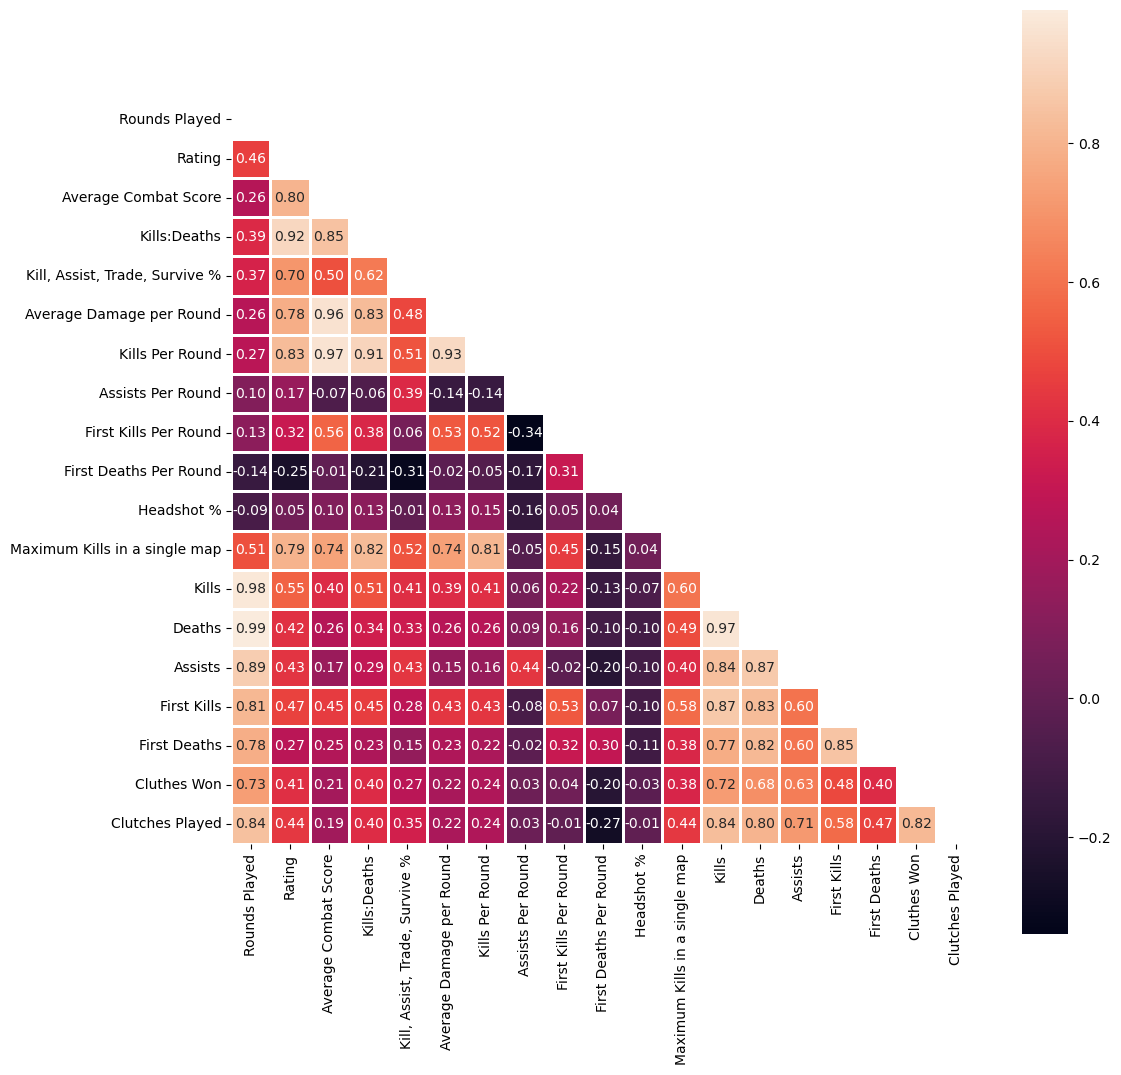

In [10]:
# geração da matrix de correlação e plotagem em um heatmap
corr_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', mask=mask, square=True, linewidths=2);

Aqui vemos correlações que fazem bastante sentido em um jogo movimentado como o Valorant, por exemplo, Abates e Mortes aumentam baseado na quantidade de jogos, mas também quando um aumenta, o outro também aumenta.

A quantidade de dano e a quantidade de bonecos que que um jogador mata/dá num round, aumenta o ACS.

Mas existem coisas que não se relacionam de jeito nenhum, por exemplo quantidade de clutches jogados e obtenção de first death, que faz bastante sentido.

### Tabela de PairPlot

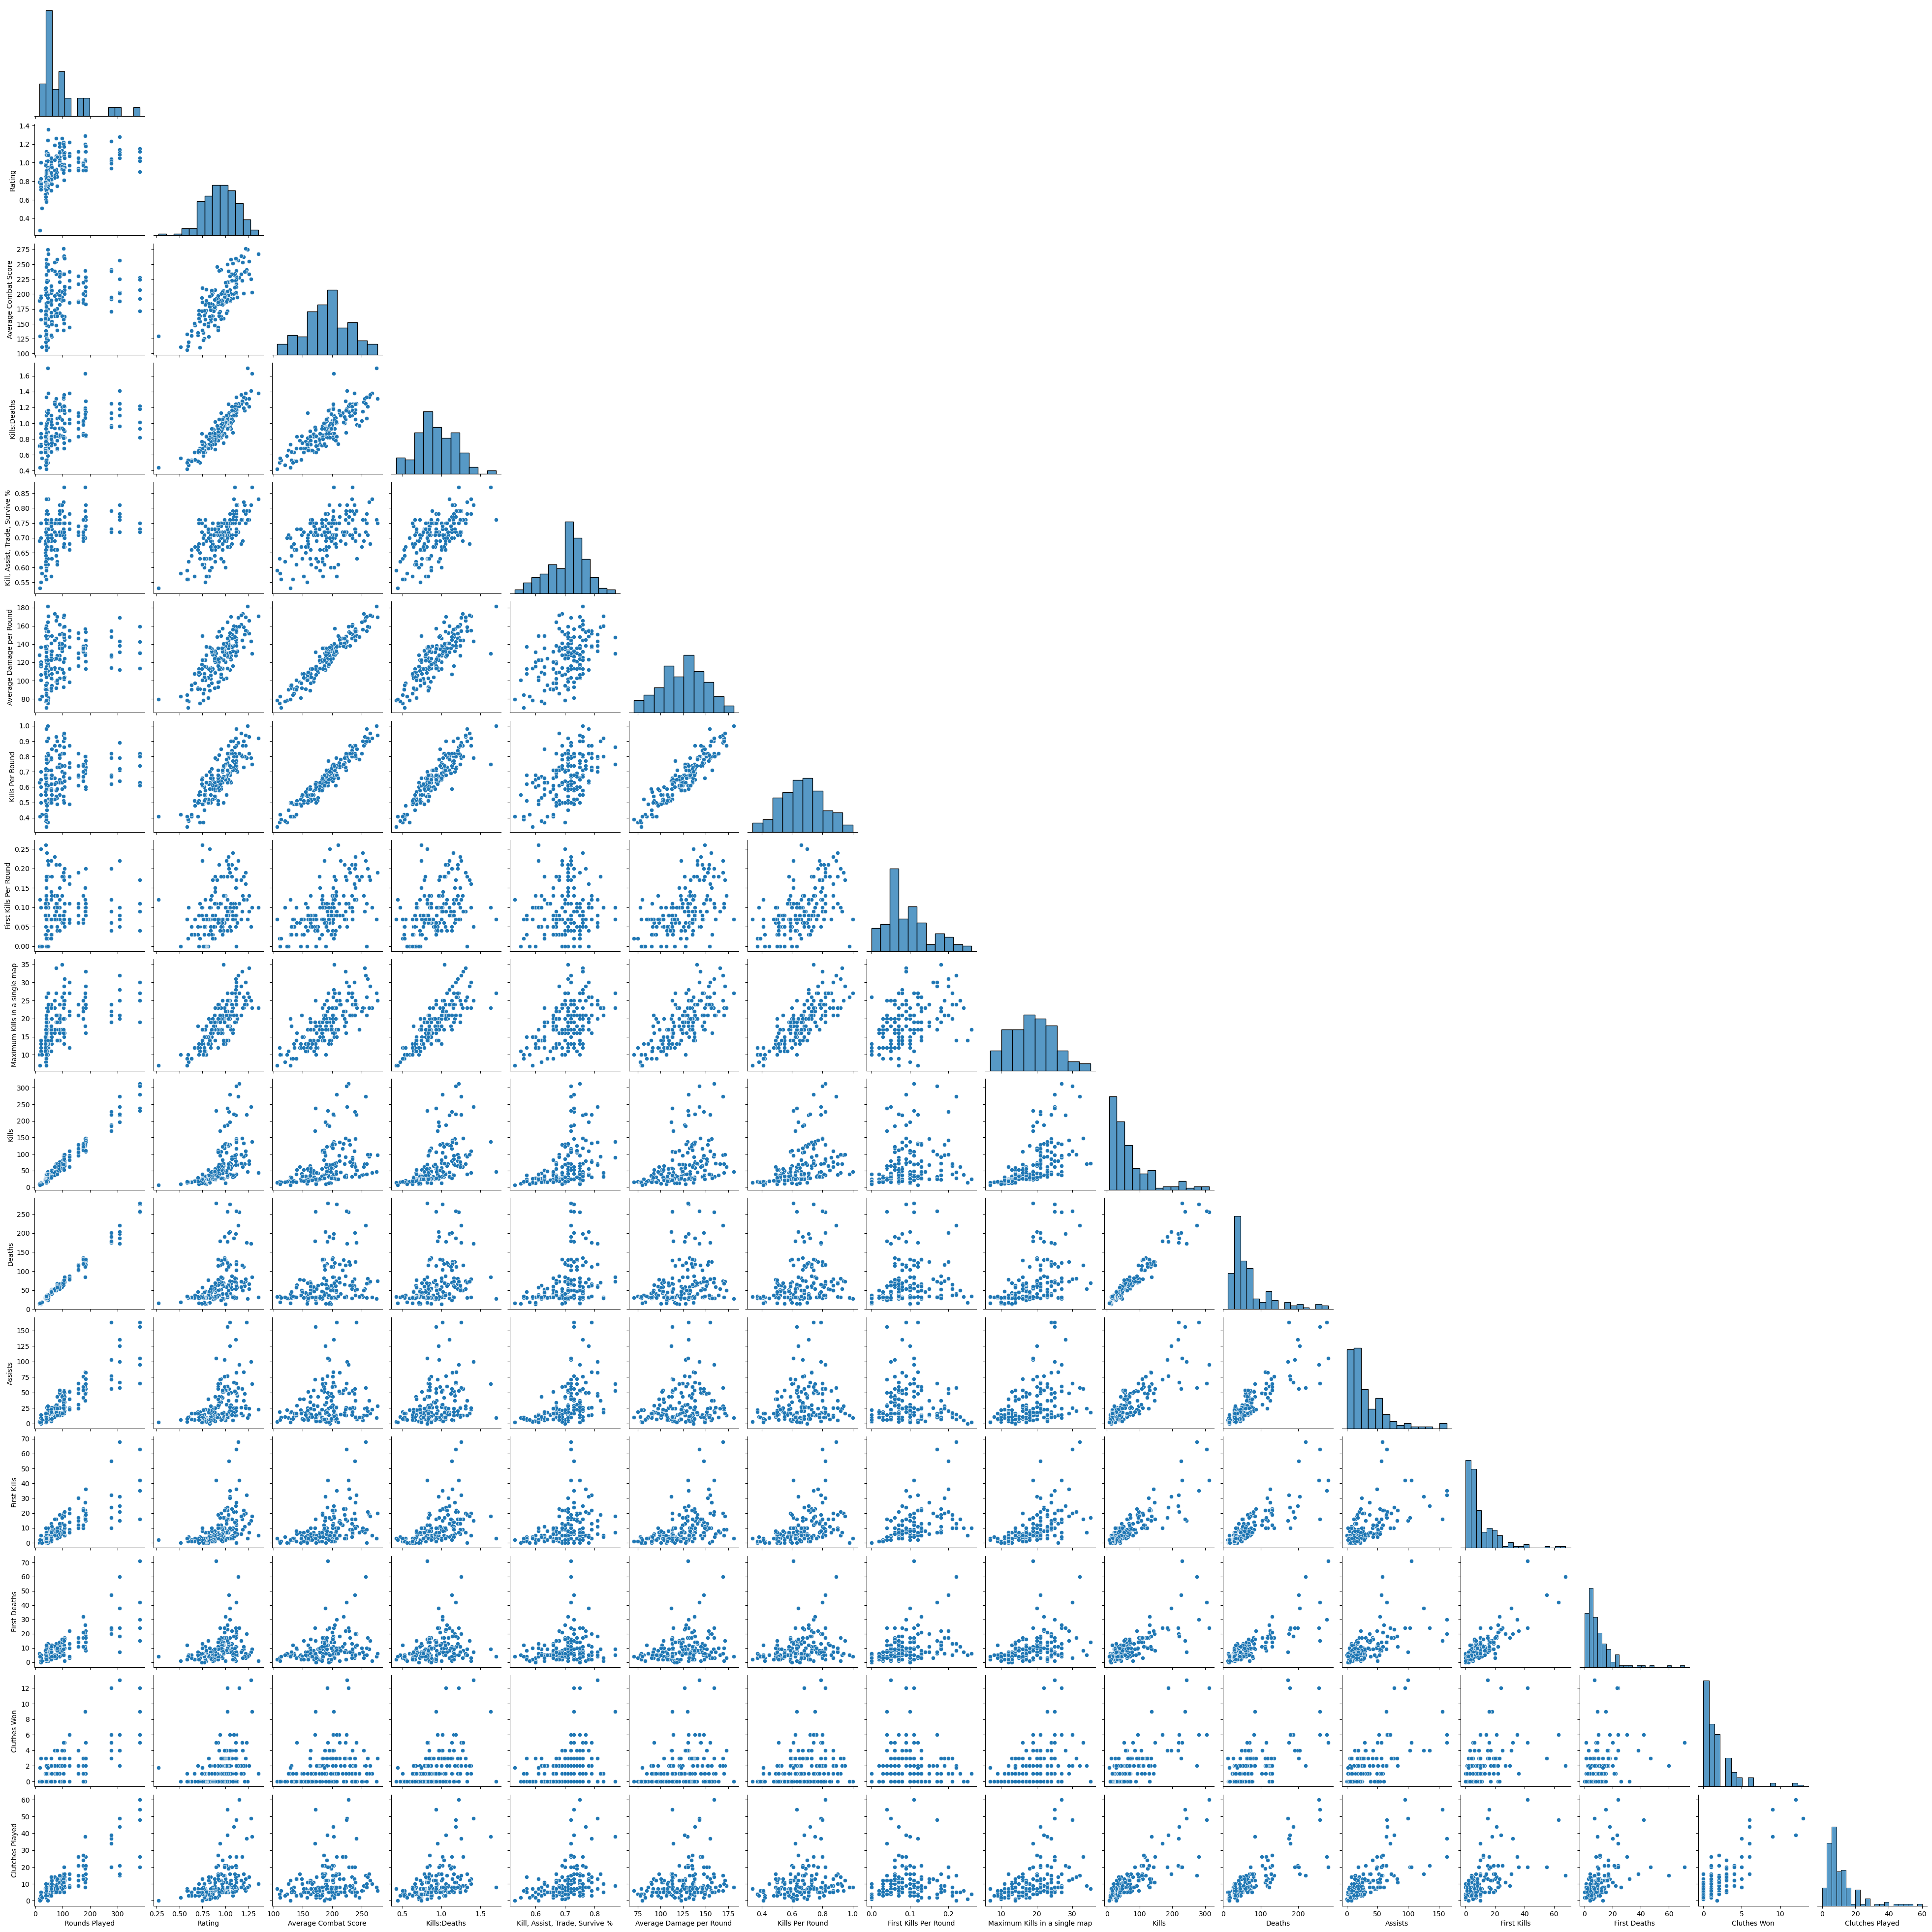

In [23]:
5# plotagem das colunas em pares
df_filter_unrelated = df.drop(columns=["Assists Per Round", "First Deaths Per Round", "Headshot %"])
sns.pairplot(df_filter_unrelated, corner=True);

### Relação Kills/Deaths dos Jogadores

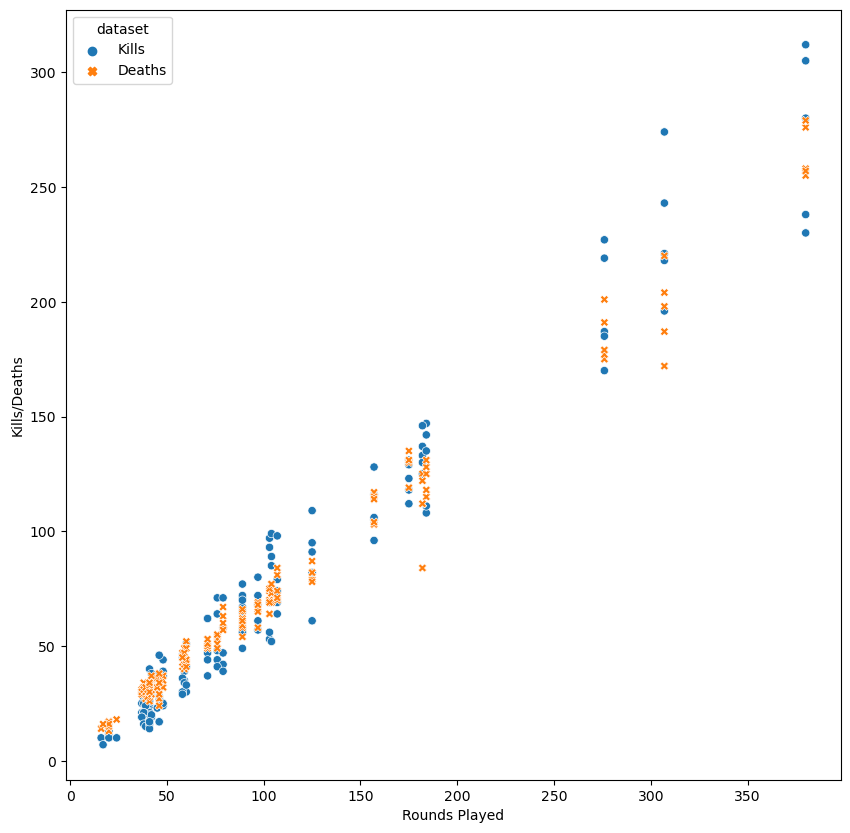

In [12]:
df_kills = df[["Kills", "Rounds Played"]]
df_death = df[["Deaths", "Rounds Played"]].rename(columns={"Deaths": "Kills"})
df_concatened = pd.concat([df_kills.assign(dataset="Kills"), df_death.assign(dataset="Deaths")])

plt.figure(figsize=(10,10))
sns_s = sns.scatterplot(x='Rounds Played', y='Kills', data=df_concatened, hue='dataset', style='dataset')
sns_s.set_ylabel("Kills/Deaths");

### DataFrame dos Dados Agrupados por Time

In [13]:
df.groupby(by="Team").mean(numeric_only=True).sort_values(by="Rounds Played", ascending=False)

,Rounds Played,Rating,Average Combat Score,Kills:Deaths,"Kill, Assist, Trade, Survive %",Average Damage per Round,Kills Per Round,Assists Per Round,First Kills Per Round,First Deaths Per Round,Headshot %,Maximum Kills in a single map,Kills,Deaths,Assists,First Kills,First Deaths,Cluthes Won,Clutches Played
Team,,,,,,,,,,,,,,,,,,,
LOUD,380.000000,1.048000,204.440000,1.032000,0.730000,135.200000,0.720000,0.308,0.104000,0.096,0.256000,25.200000,273.000000,265.000000,116.800000,39.600000,36.400000,7.600000,41.600000
FNC,307.000000,1.134000,214.740000,1.180000,0.768000,138.640000,0.750000,0.316,0.104000,0.096,0.228000,25.200000,230.400000,196.200000,96.800000,32.000000,29.400000,5.800000,29.000000
DRX,276.000000,1.044000,207.220000,1.072000,0.738000,134.180000,0.716000,0.340,0.102000,0.100,0.246000,21.000000,197.600000,184.600000,94.000000,27.600000,27.600000,6.000000,30.000000
NRG,184.000000,1.058000,205.800000,1.050000,0.764000,133.900000,0.698000,0.352,0.116000,0.086,0.216000,25.000000,128.600000,123.400000,64.600000,21.200000,15.800000,2.800000,19.200000
NAVI,182.000000,1.132000,209.160000,1.236000,0.766000,137.340000,0.736000,0.320,0.116000,0.082,0.334000,23.600000,134.200000,111.000000,58.400000,21.000000,15.200000,3.200000,17.400000
100T,175.000000,0.974000,199.220000,0.948000,0.716000,134.740000,0.700000,0.332,0.090000,0.112,0.264000,22.000000,122.600000,129.200000,58.000000,15.400000,19.600000,1.800000,20.000000
TLN,157.000000,1.008000,201.780000,0.998000,0.720000,133.860000,0.704000,0.286,0.108000,0.094,0.250000,21.600000,110.200000,110.600000,45.000000,16.800000,14.600000,2.000000,16.600000
LEV,125.000000,1.056000,200.320000,1.074000,0.720000,130.120000,0.702000,0.304,0.116000,0.082,0.230000,22.400000,87.600000,81.600000,38.000000,14.600000,10.400000,2.600000,12.400000
FUT,107.000000,1.034000,208.400000,1.012000,0.720000,134.040000,0.718000,0.328,0.100000,0.100,0.234000,22.400000,76.800000,76.000000,35.000000,10.600000,10.800000,3.200000,12.400000


### DataFrame dos Dados Agrupados por Role

In [14]:
df_role = df.groupby(by="Role").mean(numeric_only=True)
df_role

,Rounds Played,Rating,Average Combat Score,Kills:Deaths,"Kill, Assist, Trade, Survive %",Average Damage per Round,Kills Per Round,Assists Per Round,First Kills Per Round,First Deaths Per Round,Headshot %,Maximum Kills in a single map,Kills,Deaths,Assists,First Kills,First Deaths,Cluthes Won,Clutches Played
Role,,,,,,,,,,,,,,,,,,,
Controlador,99.535714,0.921071,179.914286,0.867500,0.701429,116.046429,0.617857,0.395357,0.074286,0.101071,0.264643,17.428571,64.892857,69.357143,42.107143,8.392857,9.464286,1.678571,11.035714
Duelista,96.772727,0.960909,222.972727,1.030000,0.686364,142.890909,0.776364,0.158182,0.178182,0.180455,0.264545,22.181818,78.954545,70.409091,16.590909,17.863636,14.954545,1.340341,8.090909
Flex,113.633333,0.962000,190.383333,0.950333,0.712333,126.025000,0.659667,0.300167,0.090667,0.099833,0.245667,19.083333,78.416667,77.683333,35.100000,10.933333,11.150000,2.333333,13.233333
Iniciador,87.000000,0.921081,187.283784,0.882432,0.710811,121.037838,0.642973,0.363243,0.070541,0.098108,0.277838,17.729730,58.351351,62.405405,31.891892,6.567568,7.513514,1.216216,9.162162
Sentinela,88.466667,0.925333,189.186667,0.972667,0.713333,128.166667,0.663333,0.196000,0.076667,0.062667,0.256667,18.466667,61.400000,59.066667,18.066667,6.733333,5.800000,1.400000,12.600000


### BoxPlot de Kills por Role

O boxplot, também conhecido como diagrama de caixa, é um gráfico que fornece uma representação visual das principais estatísticas descritivas de um conjunto de dados. Ele é composto por um retângulo (ou caixa) e duas linhas chamadas de "bigodes" que se estendem a partir da caixa. O boxplot é uma ferramenta útil para analisar a distribuição, a dispersão e a presença de valores atípicos nos dados.

O boxplot é uma ferramenta útil para resumir a informação essencial sobre um conjunto de dados de forma concisa. Ele permite uma rápida identificação de medidas de tendência central, dispersão e valores atípicos, facilitando a comparação de diferentes grupos ou a análise de uma única variável. Além disso, o boxplot pode ser combinado com outros gráficos e técnicas estatísticas para uma análise mais completa dos dados.

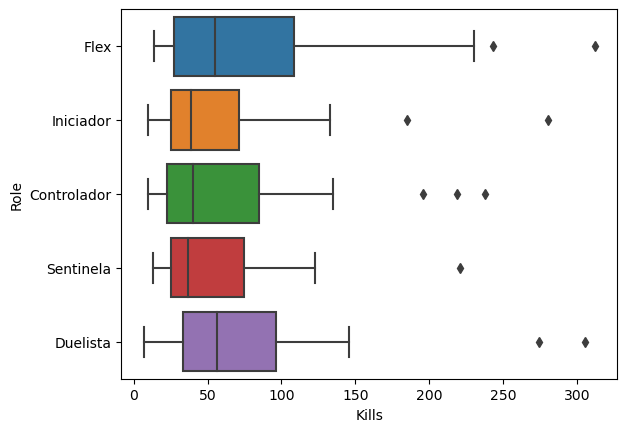

In [15]:
sns.boxplot(data=df, x="Kills", y="Role");

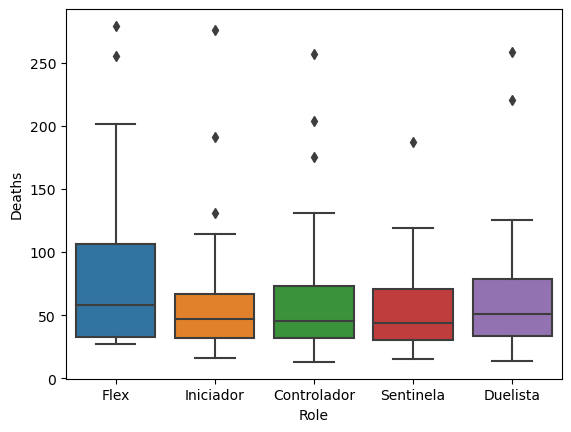

In [16]:
sns.boxplot(data=df, x="Role", y="Deaths");

### QQ-Plot de AVG Combat Score por Rating

O QQ-plot, também conhecido como gráfico quantil-quantil, é um gráfico utilizado para comparar a distribuição de uma variável com uma distribuição teórica de referência, geralmente a distribuição normal. O objetivo do QQ-plot é avaliar se os dados observados seguem uma distribuição específica e identificar possíveis desvios dessa distribuição.

O QQ-plot é uma ferramenta visual eficaz para verificar a aderência de um conjunto de dados a uma distribuição teórica. Ele permite identificar desvios da distribuição esperada e avaliar se os dados seguem um padrão específico. Além disso, o QQ-plot pode ser usado para comparar diferentes distribuições teóricas e determinar qual melhor se ajusta aos dados observados.

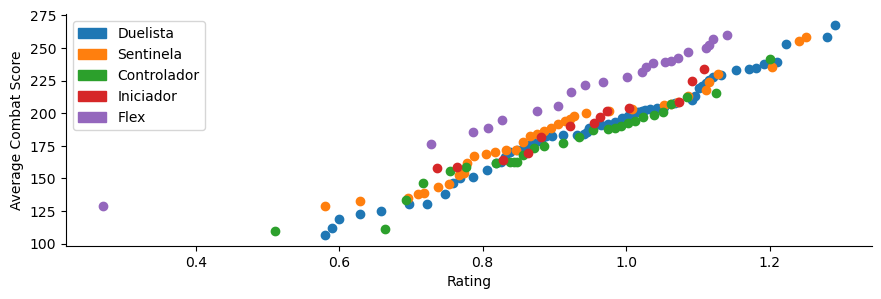

In [17]:
pplot(df, x="Rating", y="Average Combat Score", kind="qq", height=3, aspect=3, hue="Role");

### Histograma de Kills

Um histograma é um tipo de gráfico que mostra a distribuição de frequência de um conjunto de dados contínuos ou discretos. Ele é composto por barras adjacentes, onde a altura de cada barra representa a frequência ou a densidade dos valores observados em uma determinada faixa de valores.

Histogramas são úteis para identificar padrões, tendências e características importantes nos dados, fornecendo uma representação visual da distribuição dos valores observados. Eles são amplamente utilizados em análise de dados, estatística e ciência de dados para explorar e entender a natureza dos dados coletados.

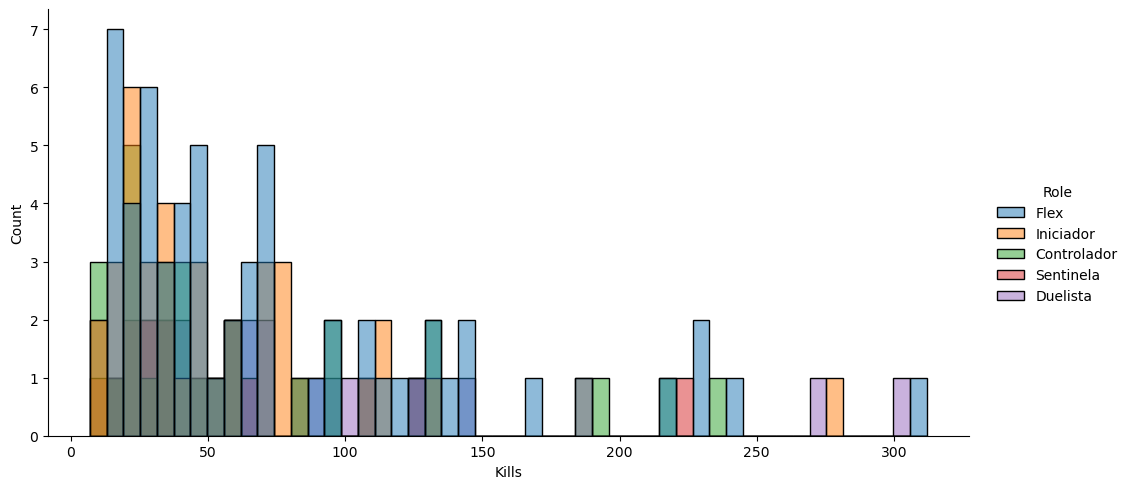

In [22]:
sns.displot(data=df, x="Kills", kind="hist", bins=50, aspect=2, hue="Role");

### Best Fit Distribution das Kills

O "Best Fit Distribution" é um método utilizado na análise de dados para encontrar a distribuição estatística que melhor se ajusta aos dados observados. O objetivo é identificar a distribuição que melhor representa os dados e, assim, facilitar a compreensão e a análise estatística desses dados.

É importante ressaltar que o processo de encontrar a melhor distribuição para análise de dados não é uma tarefa trivial e requer conhecimentos estatísticos e experiência na área de estudo. Além disso, é possível que nenhuma das distribuições candidatas se ajuste perfeitamente aos dados observados, e nesses casos, podem ser necessários métodos mais avançados, como modelos de mistura ou distribuições empíricas.

Fitting 3 distributions: 100%|███████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.08it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr,0.000483,1351.936686,-2040.736283,inf,0.042431,0.920353
gamma,0.000589,1326.797505,-2013.869759,inf,0.067582,0.431098
norm,0.001480,1406.114205,-1869.604121,inf,0.184990,0.000025


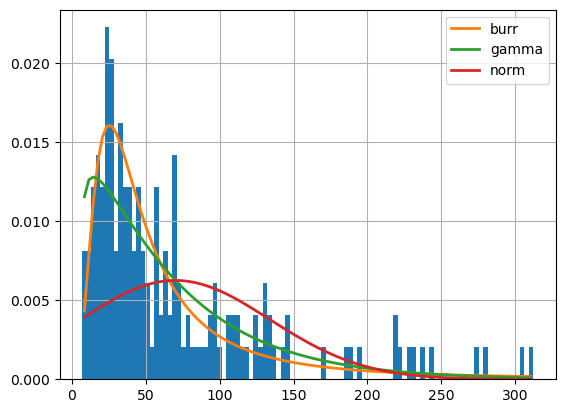

In [19]:
kills = df["Kills"].values
f = Fitter(kills, distributions=['gamma', "burr", "norm"])
f.fit()
f.summary()

### Mais Algumas Outras Análises

#### Relação Dano por Round com AVG Combat Score

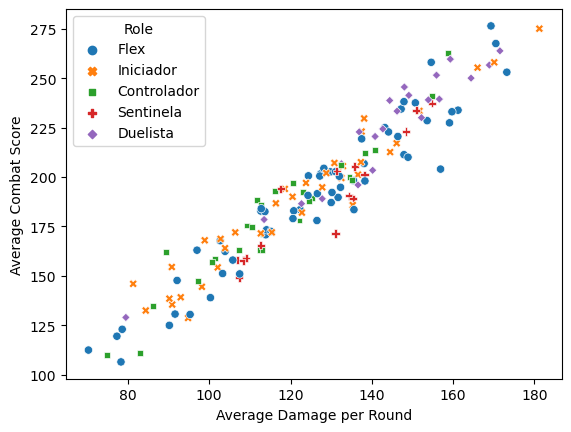

In [20]:
sns.scatterplot(x='Average Damage per Round', y='Average Combat Score', data=df, hue="Role", style="Role");

#### BarChart de Clutches por Role

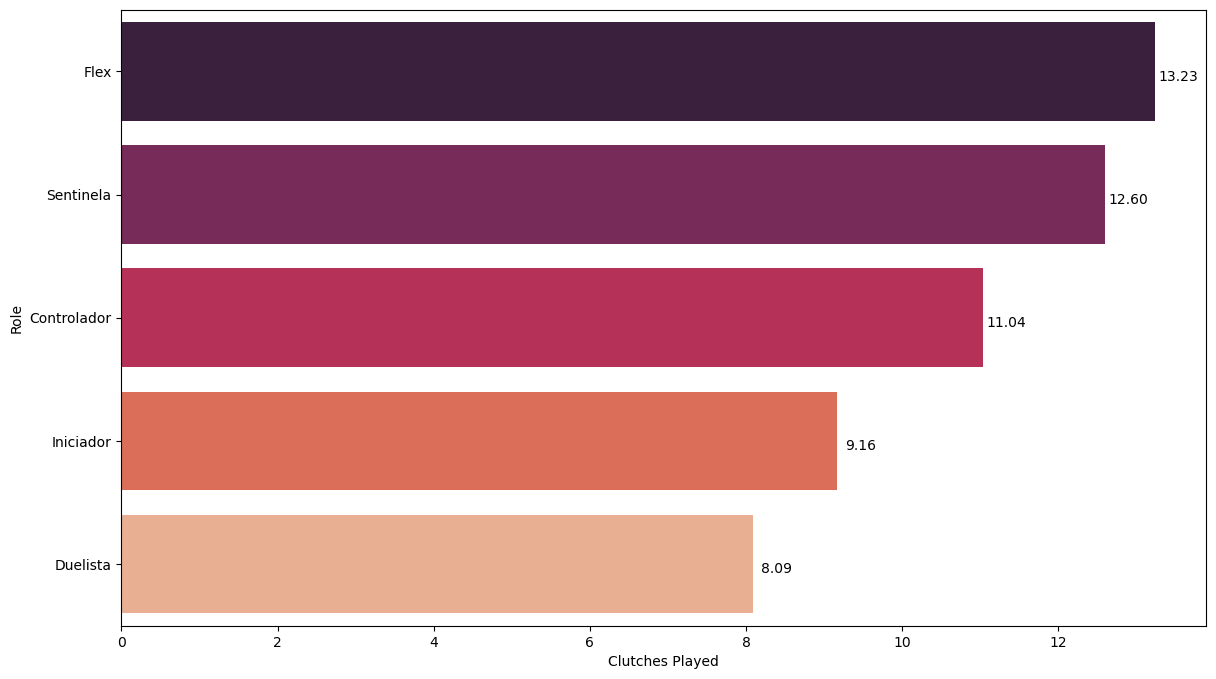

In [21]:
df_role_sorted = df_role.sort_values(by="Clutches Played", ascending=False)

plt.figure(figsize=(14,8))
sns_b = sns.barplot(x=df_role_sorted["Clutches Played"], y=df_role_sorted.index, palette="rocket")

for p in sns_b.patches:
    width = p.get_width()
    plt.text(0.3+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')